### Import basic modules

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

### Import dataset

In [2]:
# df = pd.read_csv('data/Dataset.csv')

### I/ Data cleansing (and export)
 
Using our speculations, deductions and conclusions in documentation/cleansing.md report, we would like to introduce some cleansing methods for this datasets as shown below. 

In [3]:
# import modules.cleansing as cl

# df = cl.remove_columns(df, ['PATIENT_TYPE'])
# df = cl.remove_invalid_values(df)
# df = cl.mapping_bool_values(df=df, excluded_columns=['index', 'USMER', 'MEDICAL_UNIT', 'DATE_DIED', 'AGE', 'CLASIFFICATION_FINAL'])
# df_original = df.copy()
# # df = cl.remove_outliers(df, 'AGE')
# df = cl.impute_missing_values(df=df, excluded_columns=['index', 'USMER', 'MEDICAL_UNIT', 'DATE_DIED', 'AGE'])

In [4]:
# df.to_csv('data/Dataset_revised_new.csv', index=False)
# df_original.to_csv('data/Dataset_revised_org.csv', index=False)
# df.describe()

### II/ Descriptive Statistics and Data Visualisation: 
 


In [5]:
df_original = pd.read_csv('data/Dataset_revised_org.csv')
df = pd.read_csv('data/Dataset_revised_new.csv')

/tmp/ipykernel_1124693/2795104614.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_original = pd.read_csv('data/Dataset_revised_org.csv')
/tmp/ipykernel_1124693/2795104614.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/Dataset_revised_new.csv')


In [6]:
new_column_list = []
for column in df.columns:
    if column not in ['index', 'USMER', 'MEDICAL_UNIT', 'DATE_DIED']:
        new_column_list.append(column)

analytics_df_main = df[new_column_list].copy()
analytics_df_main

,SEX,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2.0,1.0,0.0,55,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
1,1.0,0.0,1.0,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
2,1.0,0.0,0.0,37,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0
3,1.0,0.0,0.0,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
4,2.0,0.0,0.0,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200026,1.0,0.0,1.0,61,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0
200027,1.0,0.0,1.0,63,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7.0,0.0
200028,1.0,0.0,0.0,23,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7.0,0.0
200029,1.0,0.0,0.0,56,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0


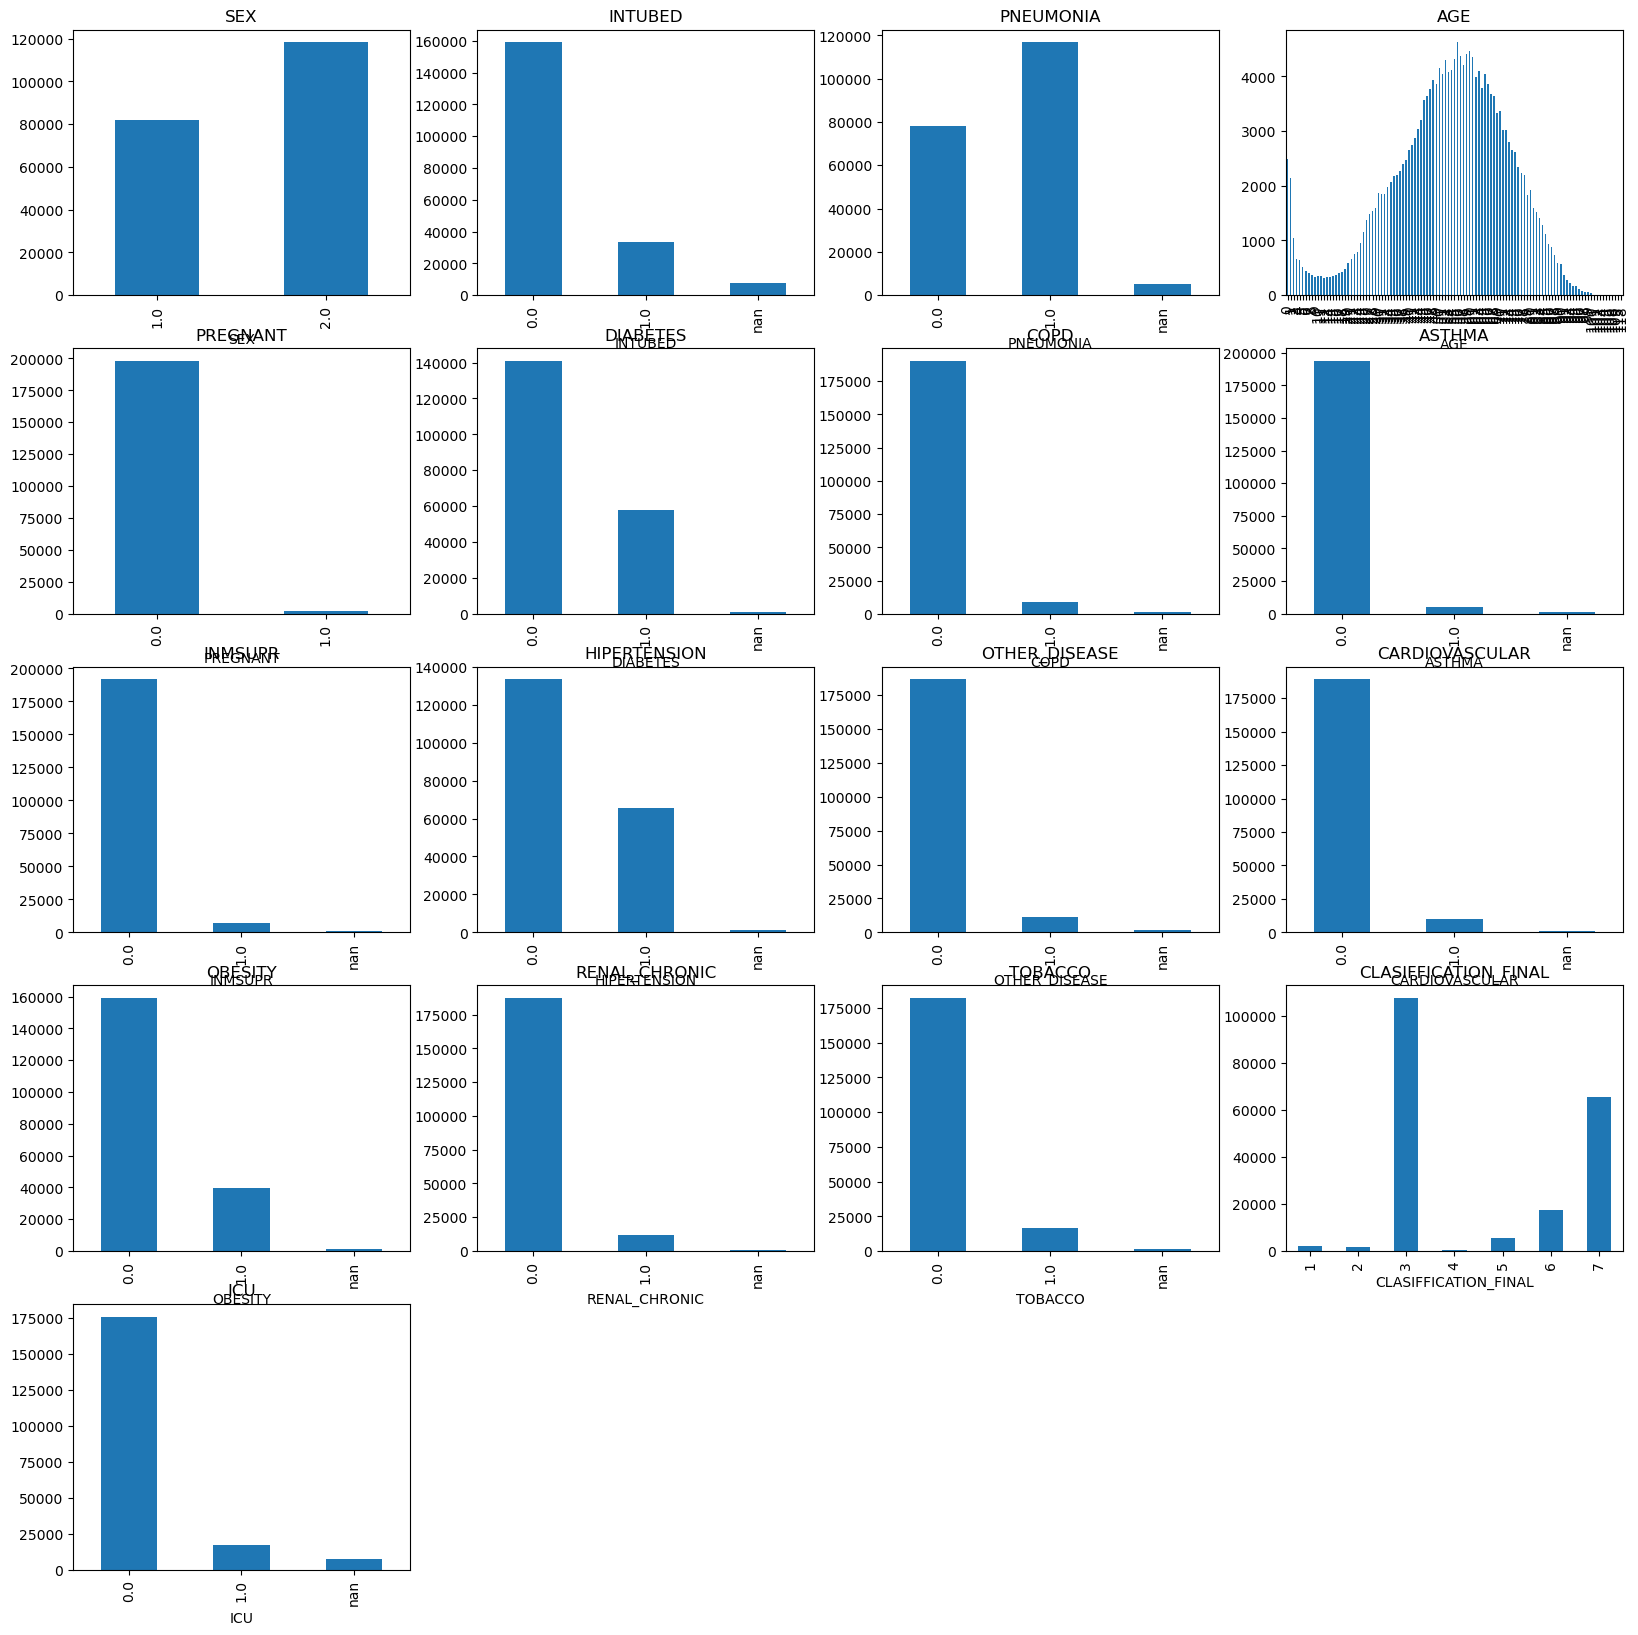

In [7]:
import modules.analytics_helper as ah

org_analytics_df = df_original[new_column_list].copy()
# analytics_df
# print(org_analytics_df['PNEUMONIA'])

ah.plot_multiple_metrics(df=org_analytics_df, columns=new_column_list, figsize=(20, 20))

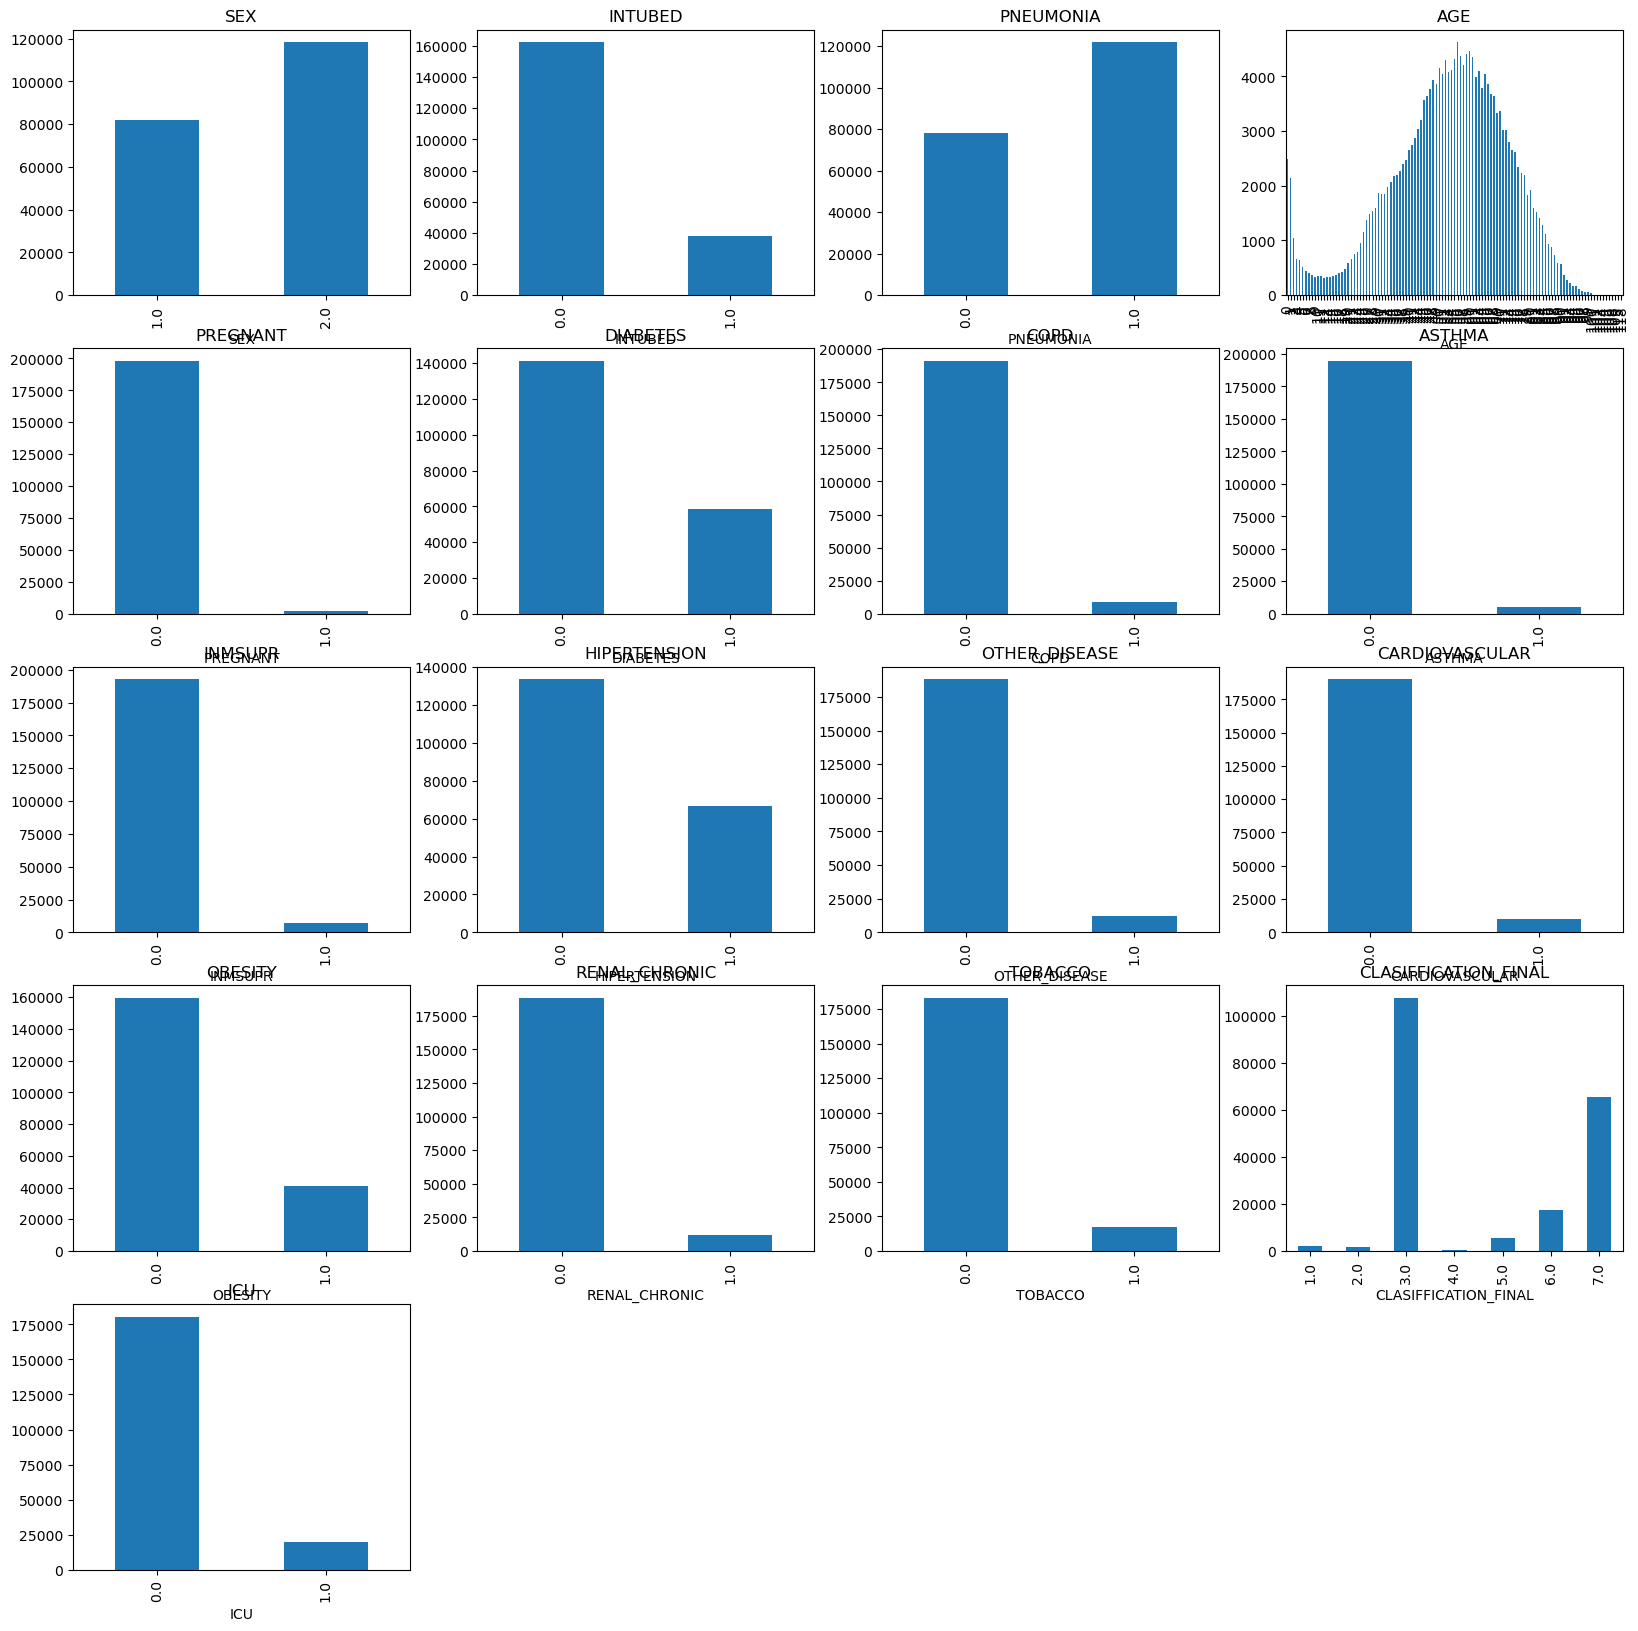

In [8]:
import modules.analytics_helper as ah

ah.plot_multiple_metrics(df=analytics_df_main, columns=new_column_list, figsize=(20, 20))

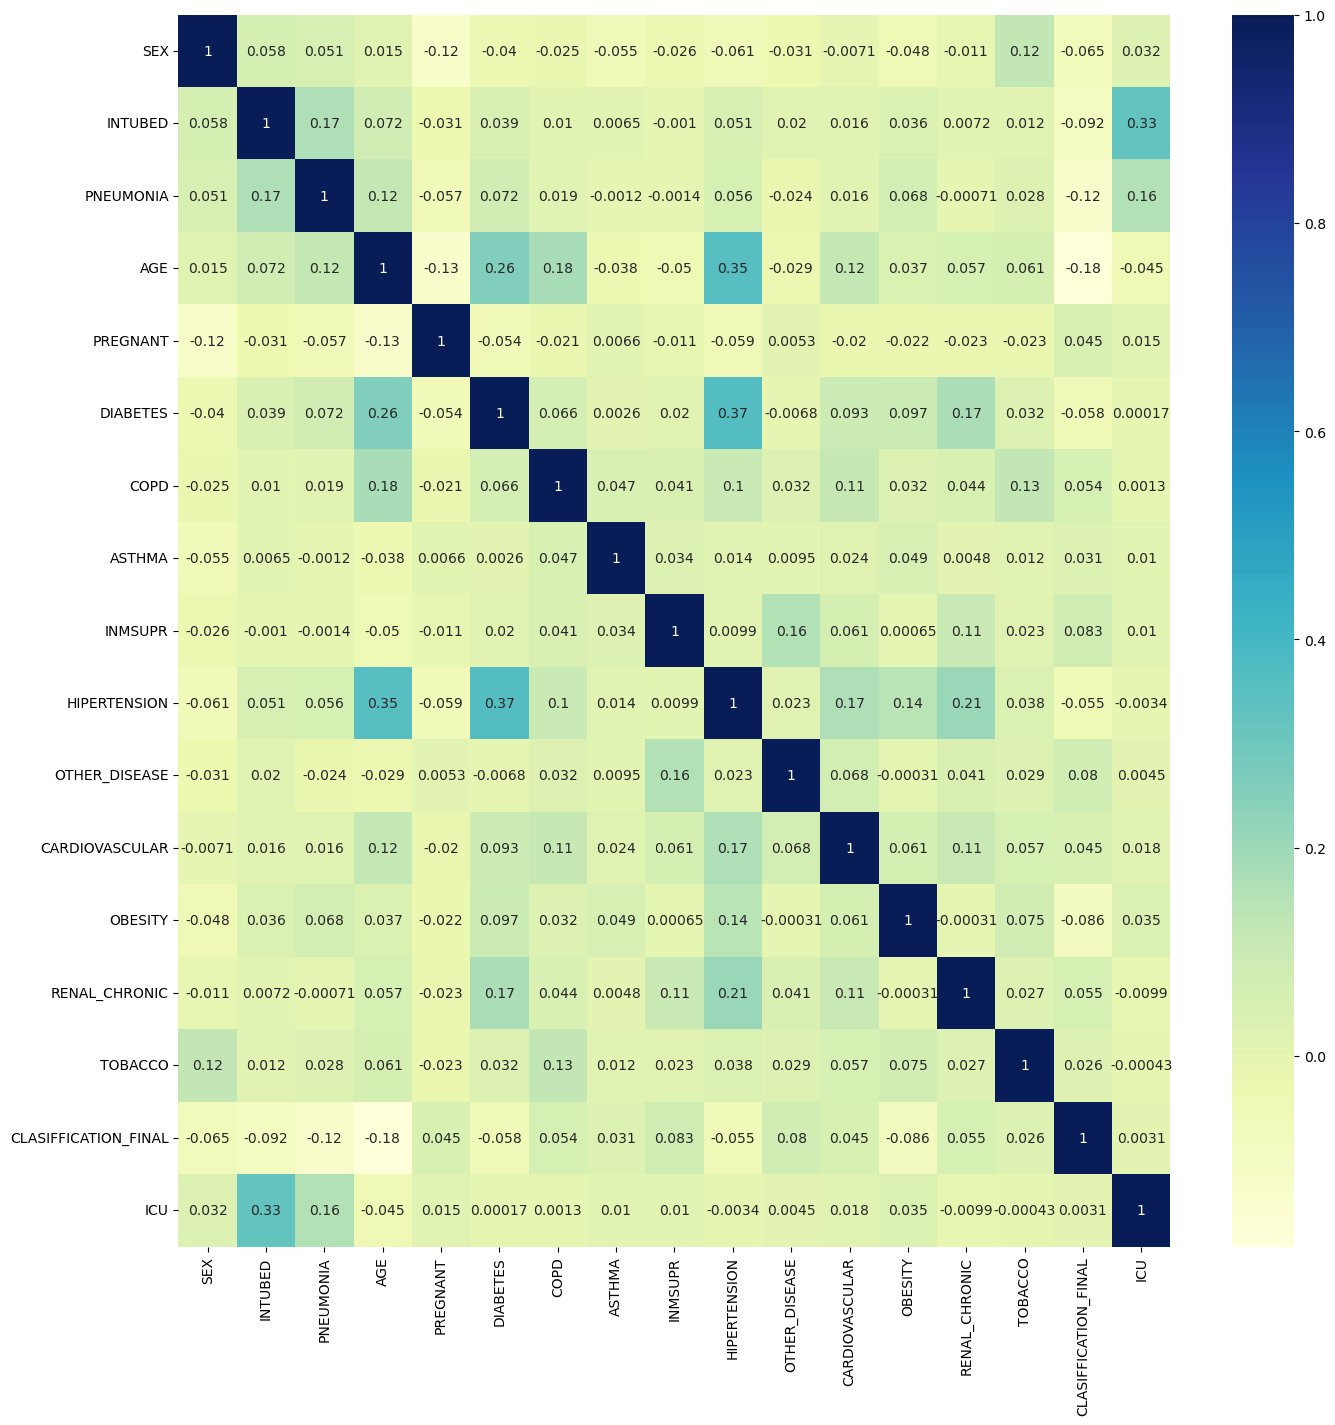

In [9]:
plt.figure(figsize=(16, 16))
co_mtx = analytics_df_main.corr(method ='pearson')

# Plot correlation heatmap
sns.heatmap(co_mtx, cmap="YlGnBu", annot=True)

# Display heatmap
plt.show()

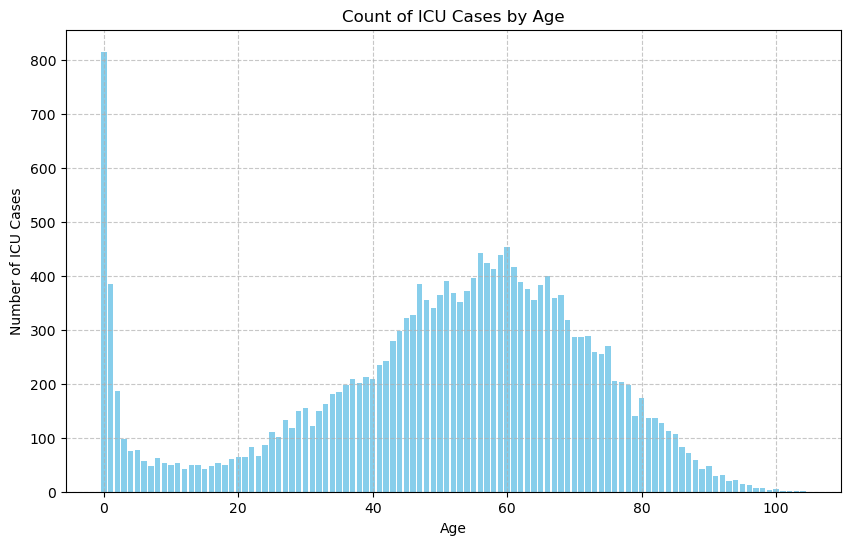

In [10]:
icu_by_age = analytics_df_main[analytics_df_main['ICU'] == 1.0].groupby('AGE').size().reset_index(name='ICU_Count')

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(icu_by_age['AGE'], icu_by_age['ICU_Count'], color='skyblue')
plt.xlabel('Age')
plt.ylabel('Number of ICU Cases')
plt.title('Count of ICU Cases by Age')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### III/ Model

In [11]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, f_classif, VarianceThreshold
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
import modules.modeling as md
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_auc_score
import modules.modeling_pyspark as mdp

# Discretize features into bins (e.g., 5 bins)
y = analytics_df_main['ICU']
X = analytics_df_main.drop(['ICU', 'CLASIFFICATION_FINAL'], axis=1)

analytics_df = analytics_df_main.drop(['CLASIFFICATION_FINAL'], axis=1)
# analytics_df['AGE'] = pd.cut(analytics_df['AGE'], bins=10, labels=False)



Moving to improved Model:


Moving to K-Means clustering Model:



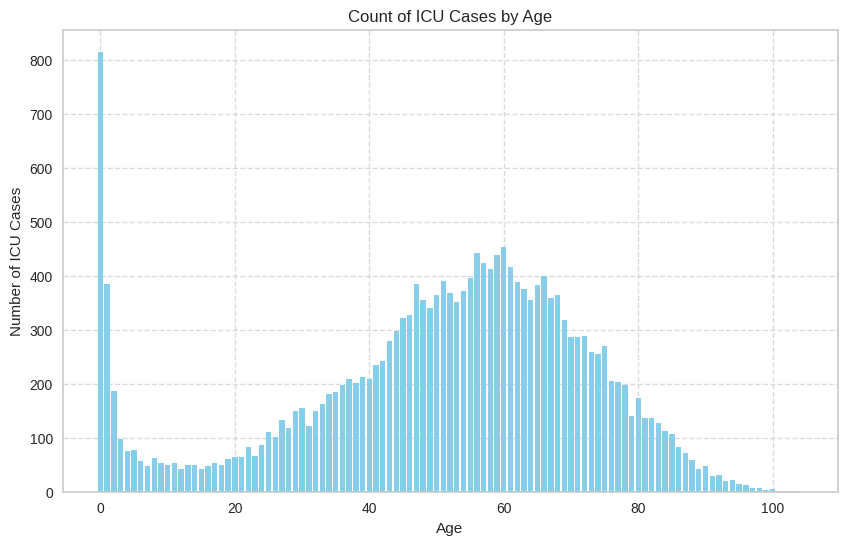

In [12]:
analytics_df = md.cleanDataForModeling(analytics_df)

icu_by_age = analytics_df_main[analytics_df_main['ICU'] == 1.0].groupby('AGE').size().reset_index(name='ICU_Count')

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(icu_by_age['AGE'], icu_by_age['ICU_Count'], color='skyblue')
plt.xlabel('Age')
plt.ylabel('Number of ICU Cases')
plt.title('Count of ICU Cases by Age')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [13]:
from collections import Counter

analytics_df = md.cleanDataForModeling(analytics_df)
occurence = []
count = 0
occurence = occurence + md.feature_selection_coefficient(df=analytics_df, target_column='ICU', select_k_best=6)
count = count + 1
print('-' * 100)
occurence = occurence + md.feature_selection_mutual_info(df=analytics_df, target_column='ICU', select_k_best=6)
count = count + 1
print('-' * 100)
occurence = occurence + md.feature_selection_anova(df=analytics_df, target_column='ICU', select_k_best=6)
count = count + 1
print('-' * 100)
occurence = occurence + md.feature_selection_chi2(df=analytics_df, target_column='ICU', continuous_columns=[], select_k_best=6)
count = count + 1
print('-' * 100)
occurence = occurence + md.feature_selection_rfe(df=analytics_df, target_column='ICU', select_k_best=6)
count = count + 1
print('-' * 100)
select_feature_probability = dict(Counter(occurence))
select_feature_probability = {k:float(v/count) for k, v in select_feature_probability.items()}
print(select_feature_probability)

Correlations with target:
INTUBED           0.326269
PNEUMONIA         0.155660
OBESITY           0.035380
SEX               0.032110
CARDIOVASCULAR    0.017832
PREGNANT          0.015103
INMSUPR           0.010256
ASTHMA            0.010072
OTHER_DISEASE     0.004523
COPD              0.001298
DIABETES          0.000168
TOBACCO          -0.000426
HIPERTENSION     -0.003412
RENAL_CHRONIC    -0.009862
AGE              -0.044928
dtype: float64
Top 6 features: ['INTUBED', 'PNEUMONIA', 'AGE', 'OBESITY', 'SEX', 'CARDIOVASCULAR']
----------------------------------------------------------------------------------------------------
Mutual Information Scores:
INTUBED           0.043743
PNEUMONIA         0.043518
SEX               0.031783
HIPERTENSION      0.012159
DIABETES          0.009709
AGE               0.003757
OBESITY           0.003177
RENAL_CHRONIC     0.001181
CARDIOVASCULAR    0.000781
PREGNANT          0.000615
INMSUPR           0.000594
ASTHMA            0.000575
OTHER_DISEASE     

### Logistic Regression Model with PySpark

#### 1. 5 chosen features: 'SEX', 'INTUBED', 'PNEUMONIA', 'AGE', 'OBESITY'

In [ ]:
# 5 chosen features: 'INTUBED', 'PNEUMONIA', 'AGE', 'OBESITY', 'SEX'
# ['INTUBED', 'PNEUMONIA', 'AGE', 'PREGNANT', 'ASTHMA', 'OTHER_DISEASE']
analytics_df = analytics_df_main[['INTUBED', 'PNEUMONIA', 'AGE', 'SEX', 'OBESITY','ICU']]
analytics_df.to_csv('data/Dataset_revised_pyspark.csv', index=False)

#Apply MinMax Scaler
analytics_df = md.cleanDataForModeling(analytics_df)

##### Apply Logistic Regression model with PySpark to dataset

25/04/11 00:04:25 WARN Utils: Your hostname, blinkpc resolves to a loopback address: 127.0.1.1; using 172.20.10.4 instead (on interface wlo1)
25/04/11 00:04:25 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/04/11 00:04:25 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


root
 |-- INTUBED: double (nullable = true)
 |-- PNEUMONIA: double (nullable = true)
 |-- AGE: integer (nullable = true)
 |-- PREGNANT: double (nullable = true)
 |-- ASTHMA: double (nullable = true)
 |-- ICU: double (nullable = true)



+-------+-------------------+-------------------+-----------------+--------------------+-------------------+-------------------+
|summary|            INTUBED|          PNEUMONIA|              AGE|            PREGNANT|             ASTHMA|                ICU|
+-------+-------------------+-------------------+-----------------+--------------------+-------------------+-------------------+
|  count|             200031|             200031|           200031|              200031|             200031|             200031|
|   mean|0.18820582809664502| 0.6089606111052787|52.77003064524999|0.009863471161969894|0.02720578310361894|0.09752988286815543|
| stddev|0.39087742090648214|0.48798440106925334|19.82984587636618| 0.09882424764296856| 0.1626830070340276|0.29667868955976645|
|    min|                0.0|                0.0|                0|                 0.0|                0.0|                0.0|
|    25%|                0.0|                0.0|               41|                 0.0|         

+---+------+
|ICU| count|
+---+------+
|0.0|144427|
|1.0| 15579|
+---+------+



Training Accuracy: 0.9050285614289464
Test Accuracy: 0.903635227982511
ROC AUC Score: 0.7612854543089742


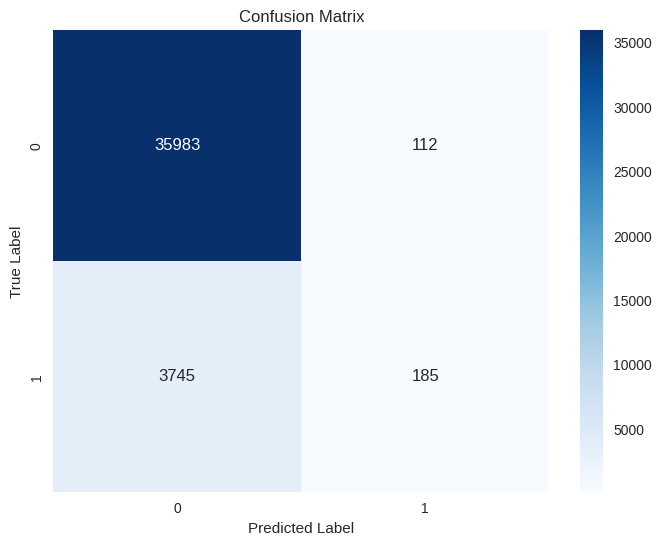


Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95     36095
           1       0.62      0.05      0.09      3930

    accuracy                           0.90     40025
   macro avg       0.76      0.52      0.52     40025
weighted avg       0.88      0.90      0.86     40025



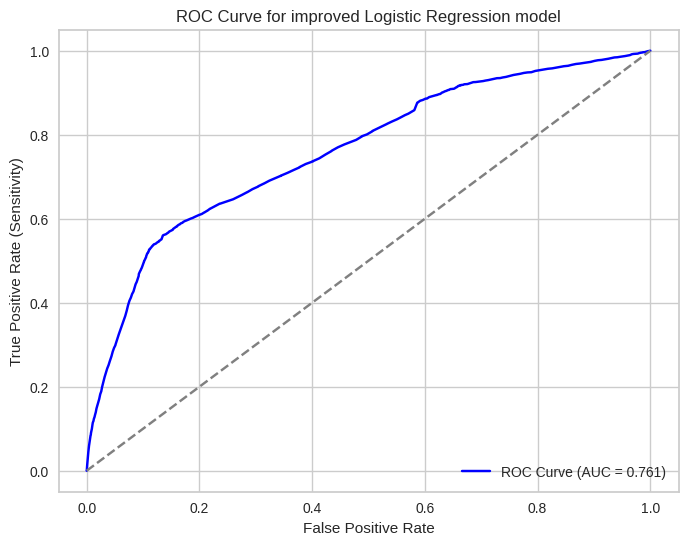

In [15]:
mdp.trainAndTestImprovedModel(DATA_PATH='data/Dataset_revised_pyspark.csv', sampling=None)

##### Apply Logistic Regression model to oversampling dataset

root
 |-- INTUBED: double (nullable = true)
 |-- PNEUMONIA: double (nullable = true)
 |-- AGE: integer (nullable = true)
 |-- PREGNANT: double (nullable = true)
 |-- ASTHMA: double (nullable = true)
 |-- ICU: double (nullable = true)



+-------+-------------------+-------------------+-----------------+--------------------+-------------------+-------------------+
|summary|            INTUBED|          PNEUMONIA|              AGE|            PREGNANT|             ASTHMA|                ICU|
+-------+-------------------+-------------------+-----------------+--------------------+-------------------+-------------------+
|  count|             200031|             200031|           200031|              200031|             200031|             200031|
|   mean|0.18820582809664502| 0.6089606111052787|52.77003064524999|0.009863471161969894|0.02720578310361894|0.09752988286815543|
| stddev|0.39087742090648214|0.48798440106925334|19.82984587636618| 0.09882424764296856| 0.1626830070340276|0.29667868955976645|
|    min|                0.0|                0.0|                0|                 0.0|                0.0|                0.0|
|    25%|                0.0|                0.0|               41|                 0.0|         

+---+------+
|ICU| count|
+---+------+
|0.0|144427|
|1.0|144590|
+---+------+



Training Accuracy: 0.7206531103706703
Test Accuracy: 0.8073204247345409
ROC AUC Score: 0.7607610888287087


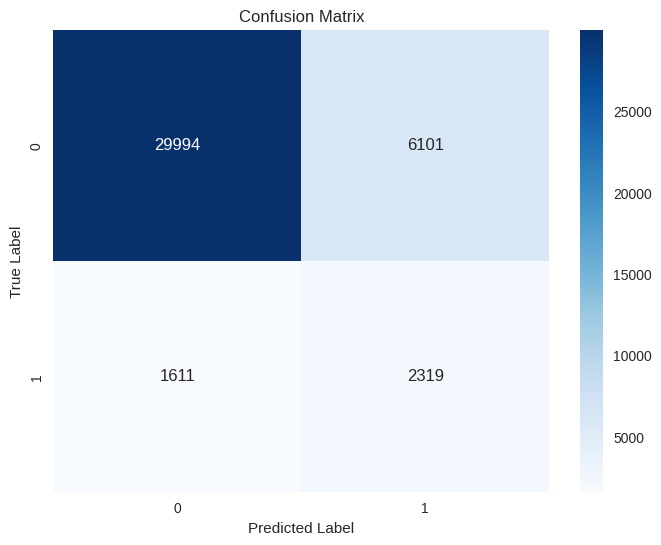


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.83      0.89     36095
           1       0.28      0.59      0.38      3930

    accuracy                           0.81     40025
   macro avg       0.61      0.71      0.63     40025
weighted avg       0.88      0.81      0.84     40025



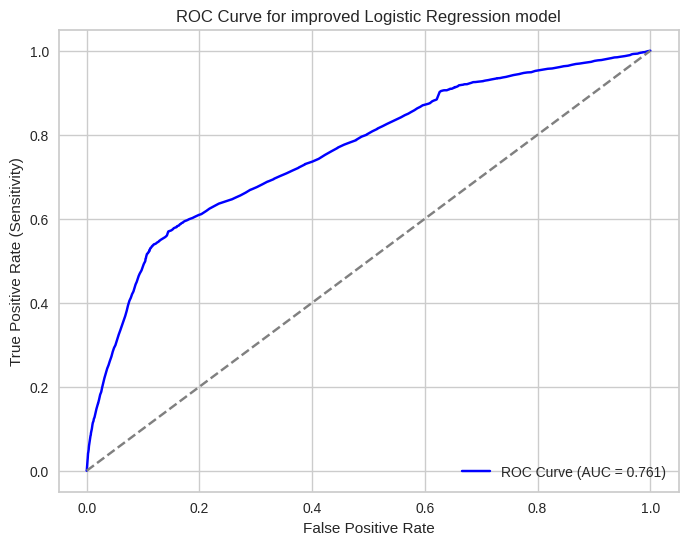

In [16]:
mdp.trainAndTestImprovedModel(DATA_PATH='data/Dataset_revised_pyspark.csv', sampling='oversampling')

root
 |-- INTUBED: double (nullable = true)
 |-- PNEUMONIA: double (nullable = true)
 |-- AGE: integer (nullable = true)
 |-- PREGNANT: double (nullable = true)
 |-- ASTHMA: double (nullable = true)
 |-- ICU: double (nullable = true)

+-------+-------------------+-------------------+-----------------+--------------------+-------------------+-------------------+
|summary|            INTUBED|          PNEUMONIA|              AGE|            PREGNANT|             ASTHMA|                ICU|
+-------+-------------------+-------------------+-----------------+--------------------+-------------------+-------------------+
|  count|             200031|             200031|           200031|              200031|             200031|             200031|
|   mean|0.18820582809664502| 0.6089606111052787|52.77003064524999|0.009863471161969894|0.02720578310361894|0.09752988286815543|
| stddev|0.39087742090648214|0.48798440106925334|19.82984587636618| 0.09882424764296856| 0.1626830070340276|0.2966786895

Training Accuracy: 0.7178563386624635
Test Accuracy: 0.8057464084946908
ROC AUC Score: 0.7611599303083079


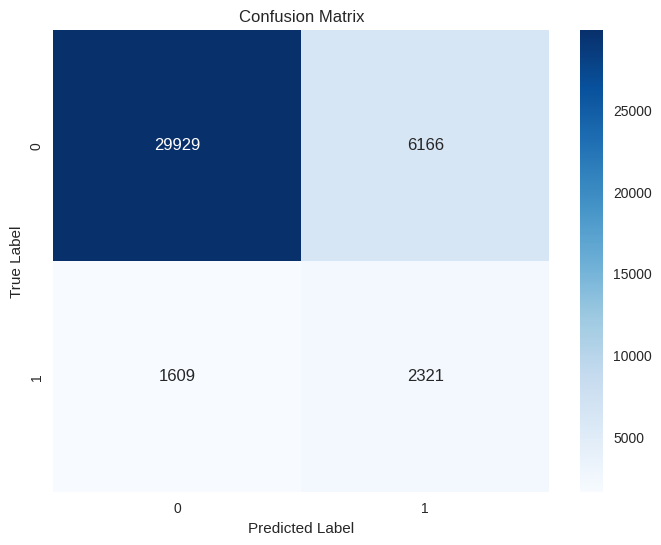


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.83      0.89     36095
           1       0.27      0.59      0.37      3930

    accuracy                           0.81     40025
   macro avg       0.61      0.71      0.63     40025
weighted avg       0.88      0.81      0.83     40025



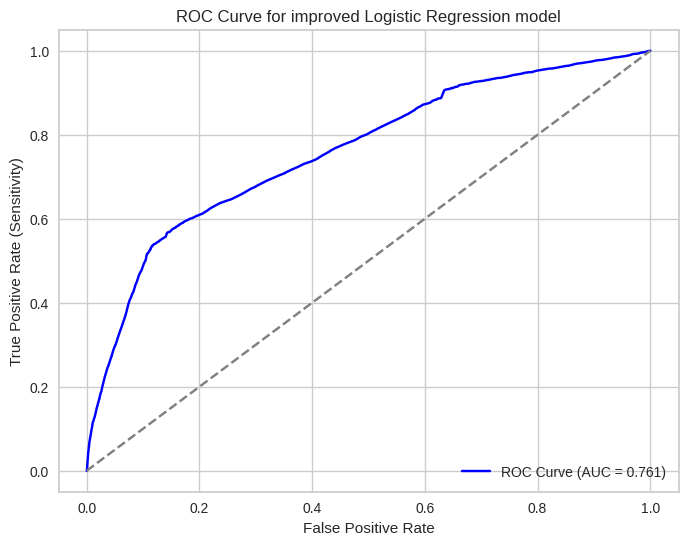

In [17]:
mdp.trainAndTestImprovedModel(DATA_PATH='data/Dataset_revised_pyspark.csv', sampling='undersampling')

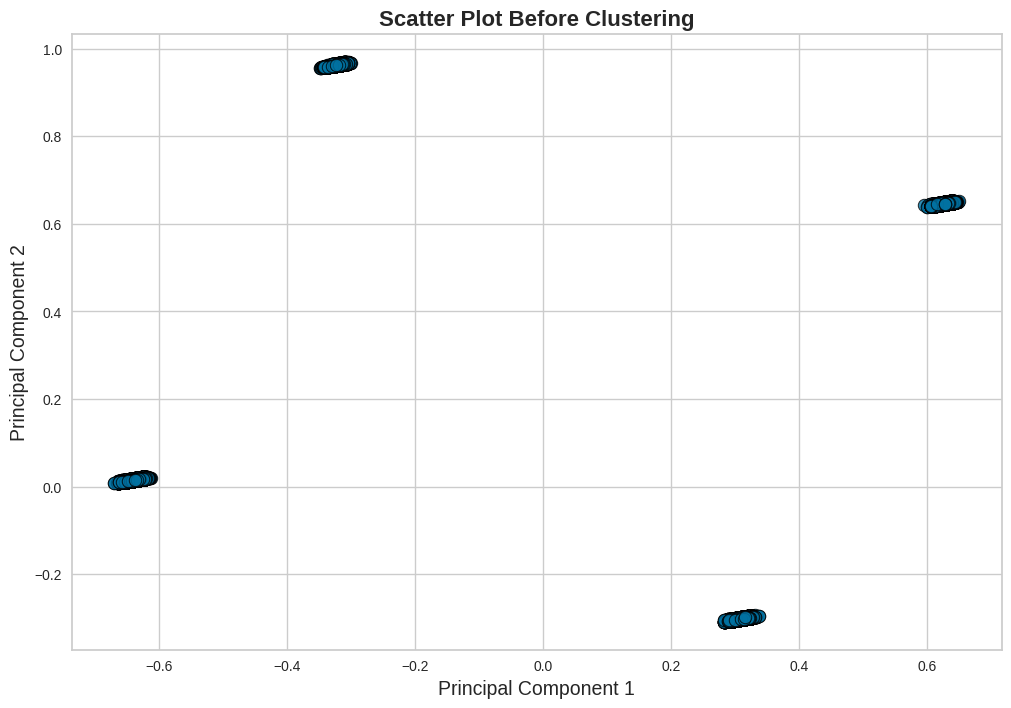

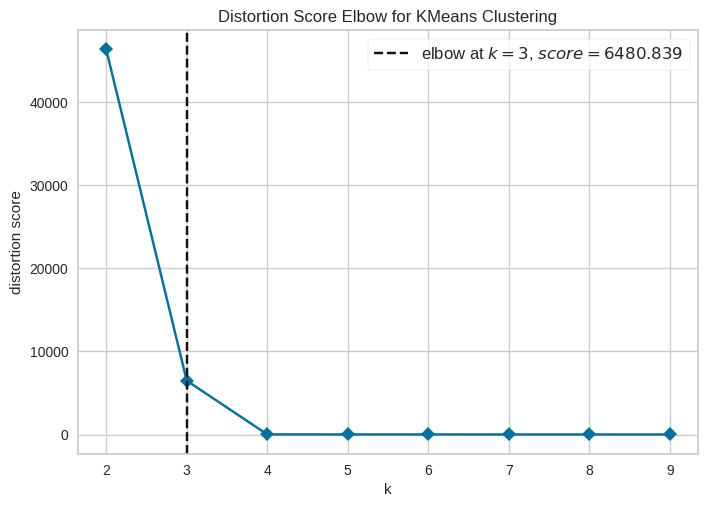

The optimal number of clusters is: 3


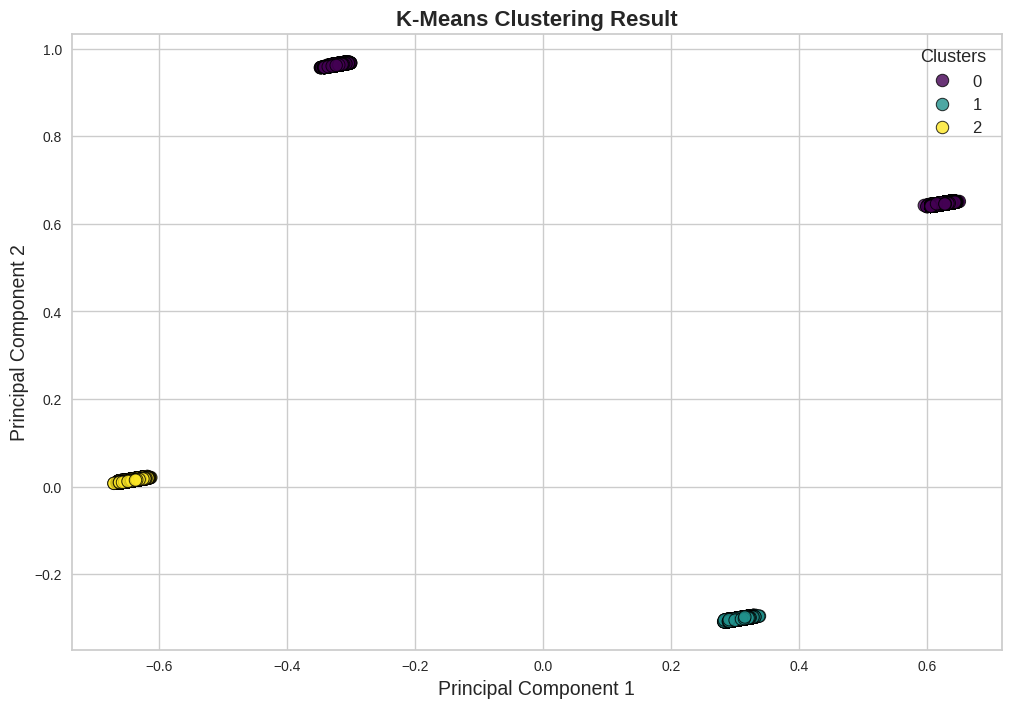

Training and evaluating model for Cluster 0...

Cluster 0 - Accuracy: 0.7158034528552457
Cluster 0 - AUC: 0.6591192614612825
Cluster 0 - Confusion Matrix:
[[5119  164]
 [1976  271]]
Cluster 0 - Classification Report:
              precision    recall  f1-score   support

         0.0       0.72      0.97      0.83      5283
         1.0       0.62      0.12      0.20      2247

    accuracy                           0.72      7530
   macro avg       0.67      0.54      0.51      7530
weighted avg       0.69      0.72      0.64      7530

Training and evaluating model for Cluster 1...

Cluster 1 - Accuracy: 0.9356652430123804
Cluster 1 - AUC: 0.5248801548700602
Cluster 1 - Confusion Matrix:
[[17307     0]
 [ 1190     0]]
Cluster 1 - Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     17307
         1.0       0.00      0.00      0.00      1190

    accuracy                           0.94     18497
   macro avg     

/opt/miniconda3/envs/conda-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/envs/conda-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/envs/conda-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

{0: {'Accuracy': 0.7158034528552457,
  'AUC': 0.6591192614612825,
  'Confusion Matrix': array([[5119,  164],
         [1976,  271]]),
  'Classification Report': '              precision    recall  f1-score   support\n\n         0.0       0.72      0.97      0.83      5283\n         1.0       0.62      0.12      0.20      2247\n\n    accuracy                           0.72      7530\n   macro avg       0.67      0.54      0.51      7530\nweighted avg       0.69      0.72      0.64      7530\n'},
 1: {'Accuracy': 0.9356652430123804,
  'AUC': 0.5248801548700602,
  'Confusion Matrix': array([[17307,     0],
         [ 1190,     0]]),
  'Classification Report': '              precision    recall  f1-score   support\n\n         0.0       0.94      1.00      0.97     17307\n         1.0       0.00      0.00      0.00      1190\n\n    accuracy                           0.94     18497\n   macro avg       0.47      0.50      0.48     18497\nweighted avg       0.88      0.94      0.90     18497\n

In [18]:
mdp.trainAndTestKmeansClassifiers(DATA_PATH='data/Dataset_revised_pyspark.csv', sampling=None)

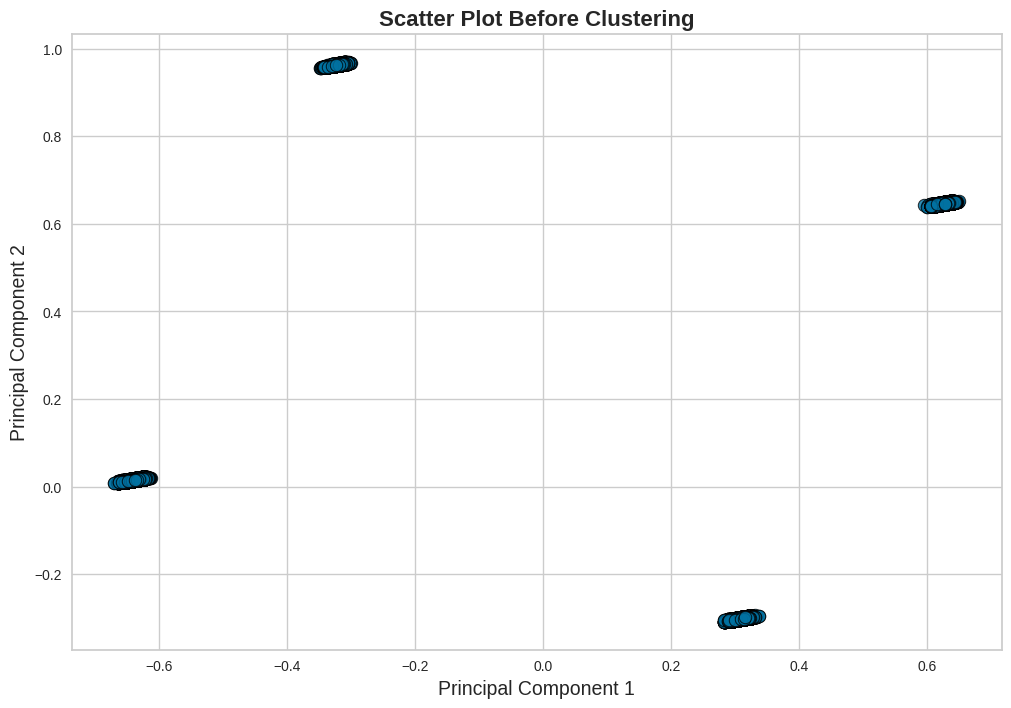

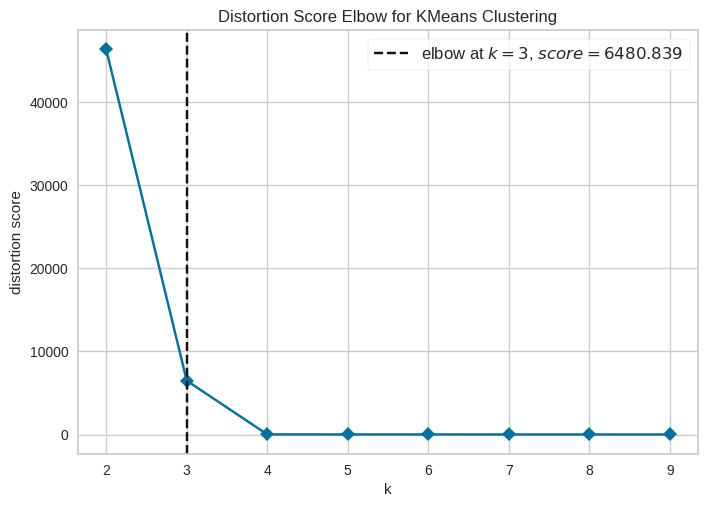

The optimal number of clusters is: 3


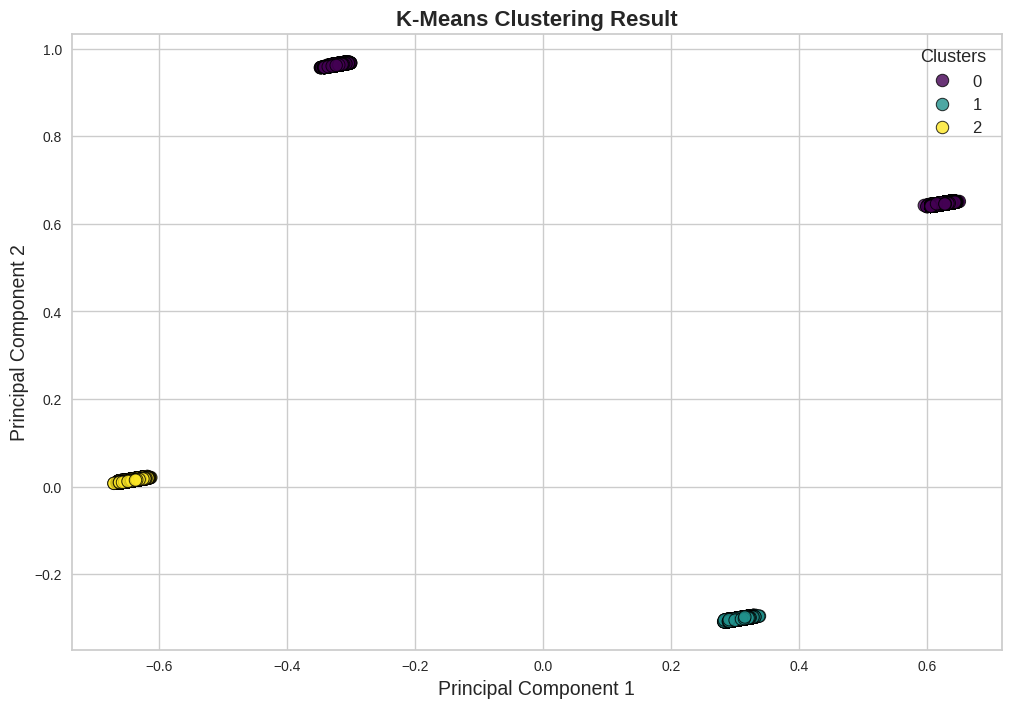

Training and evaluating model for Cluster 0...

Cluster 0 - Accuracy: 0.7158034528552457
Cluster 0 - AUC: 0.6591192614612825
Cluster 0 - Confusion Matrix:
[[5119  164]
 [1976  271]]
Cluster 0 - Classification Report:
              precision    recall  f1-score   support

         0.0       0.72      0.97      0.83      5283
         1.0       0.62      0.12      0.20      2247

    accuracy                           0.72      7530
   macro avg       0.67      0.54      0.51      7530
weighted avg       0.69      0.72      0.64      7530

Training and evaluating model for Cluster 1...

Cluster 1 - Accuracy: 0.9356652430123804
Cluster 1 - AUC: 0.5248801548700602
Cluster 1 - Confusion Matrix:
[[17307     0]
 [ 1190     0]]
Cluster 1 - Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     17307
         1.0       0.00      0.00      0.00      1190

    accuracy                           0.94     18497
   macro avg     

/opt/miniconda3/envs/conda-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/envs/conda-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/envs/conda-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

{0: {'Accuracy': 0.7158034528552457,
  'AUC': 0.6591192614612825,
  'Confusion Matrix': array([[5119,  164],
         [1976,  271]]),
  'Classification Report': '              precision    recall  f1-score   support\n\n         0.0       0.72      0.97      0.83      5283\n         1.0       0.62      0.12      0.20      2247\n\n    accuracy                           0.72      7530\n   macro avg       0.67      0.54      0.51      7530\nweighted avg       0.69      0.72      0.64      7530\n'},
 1: {'Accuracy': 0.9356652430123804,
  'AUC': 0.5248801548700602,
  'Confusion Matrix': array([[17307,     0],
         [ 1190,     0]]),
  'Classification Report': '              precision    recall  f1-score   support\n\n         0.0       0.94      1.00      0.97     17307\n         1.0       0.00      0.00      0.00      1190\n\n    accuracy                           0.94     18497\n   macro avg       0.47      0.50      0.48     18497\nweighted avg       0.88      0.94      0.90     18497\n

In [19]:
mdp.trainAndTestKmeansClassifiers(DATA_PATH='data/Dataset_revised_pyspark.csv', sampling=None)

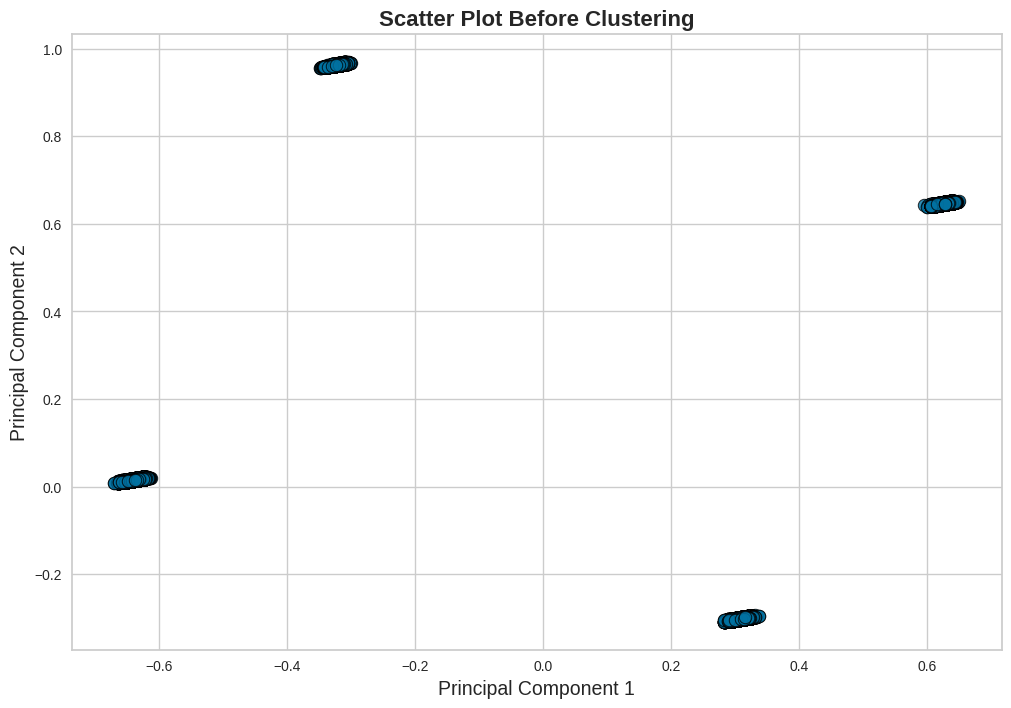

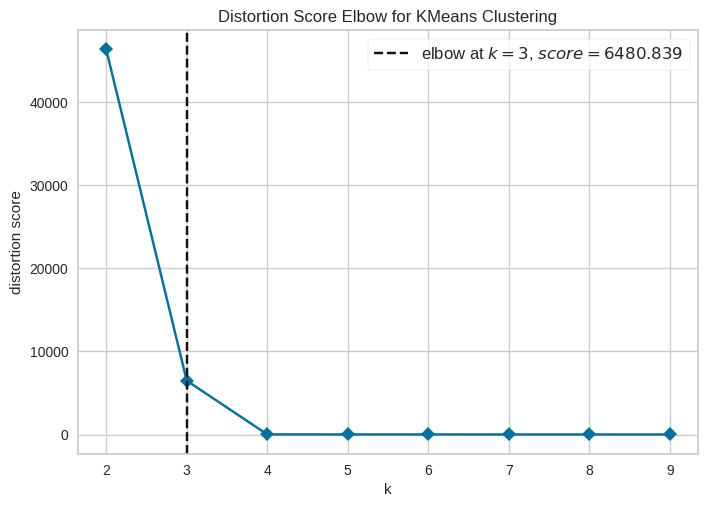

The optimal number of clusters is: 3


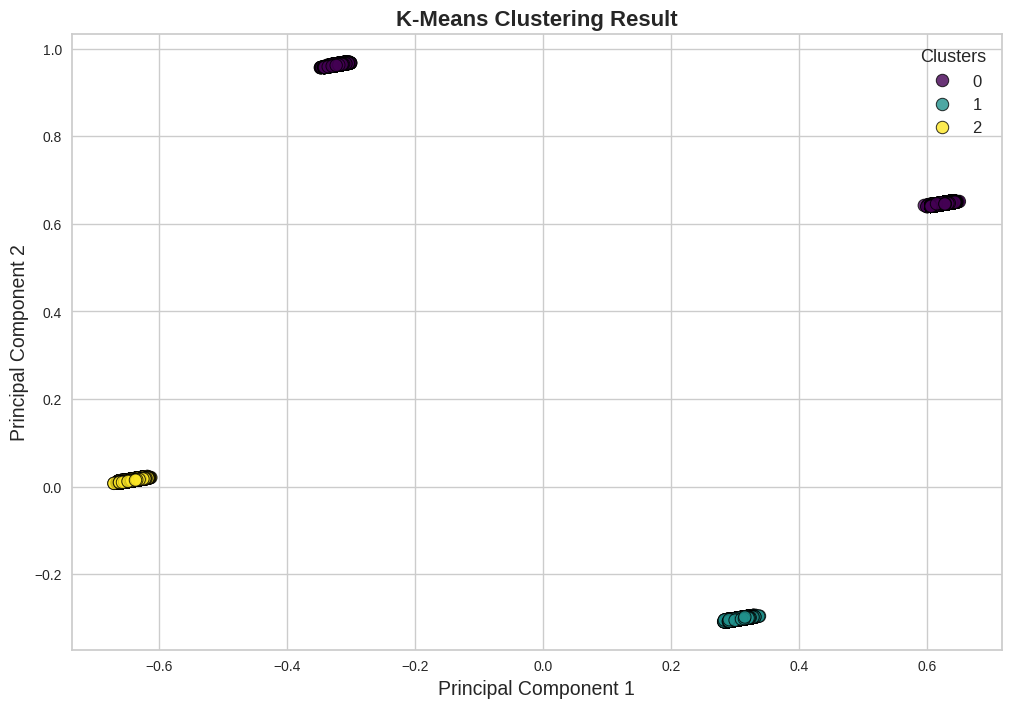

Training and evaluating model for Cluster 0...

Cluster 0 - Accuracy: 0.7158034528552457
Cluster 0 - AUC: 0.6591192614612825
Cluster 0 - Confusion Matrix:
[[5119  164]
 [1976  271]]
Cluster 0 - Classification Report:
              precision    recall  f1-score   support

         0.0       0.72      0.97      0.83      5283
         1.0       0.62      0.12      0.20      2247

    accuracy                           0.72      7530
   macro avg       0.67      0.54      0.51      7530
weighted avg       0.69      0.72      0.64      7530

Training and evaluating model for Cluster 1...

Cluster 1 - Accuracy: 0.9356652430123804
Cluster 1 - AUC: 0.5248801548700602
Cluster 1 - Confusion Matrix:
[[17307     0]
 [ 1190     0]]
Cluster 1 - Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     17307
         1.0       0.00      0.00      0.00      1190

    accuracy                           0.94     18497
   macro avg     

/opt/miniconda3/envs/conda-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/envs/conda-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/envs/conda-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

{0: {'Accuracy': 0.7158034528552457,
  'AUC': 0.6591192614612825,
  'Confusion Matrix': array([[5119,  164],
         [1976,  271]]),
  'Classification Report': '              precision    recall  f1-score   support\n\n         0.0       0.72      0.97      0.83      5283\n         1.0       0.62      0.12      0.20      2247\n\n    accuracy                           0.72      7530\n   macro avg       0.67      0.54      0.51      7530\nweighted avg       0.69      0.72      0.64      7530\n'},
 1: {'Accuracy': 0.9356652430123804,
  'AUC': 0.5248801548700602,
  'Confusion Matrix': array([[17307,     0],
         [ 1190,     0]]),
  'Classification Report': '              precision    recall  f1-score   support\n\n         0.0       0.94      1.00      0.97     17307\n         1.0       0.00      0.00      0.00      1190\n\n    accuracy                           0.94     18497\n   macro avg       0.47      0.50      0.48     18497\nweighted avg       0.88      0.94      0.90     18497\n

In [20]:
mdp.trainAndTestKmeansClassifiers(DATA_PATH='data/Dataset_revised_pyspark.csv', sampling=None)

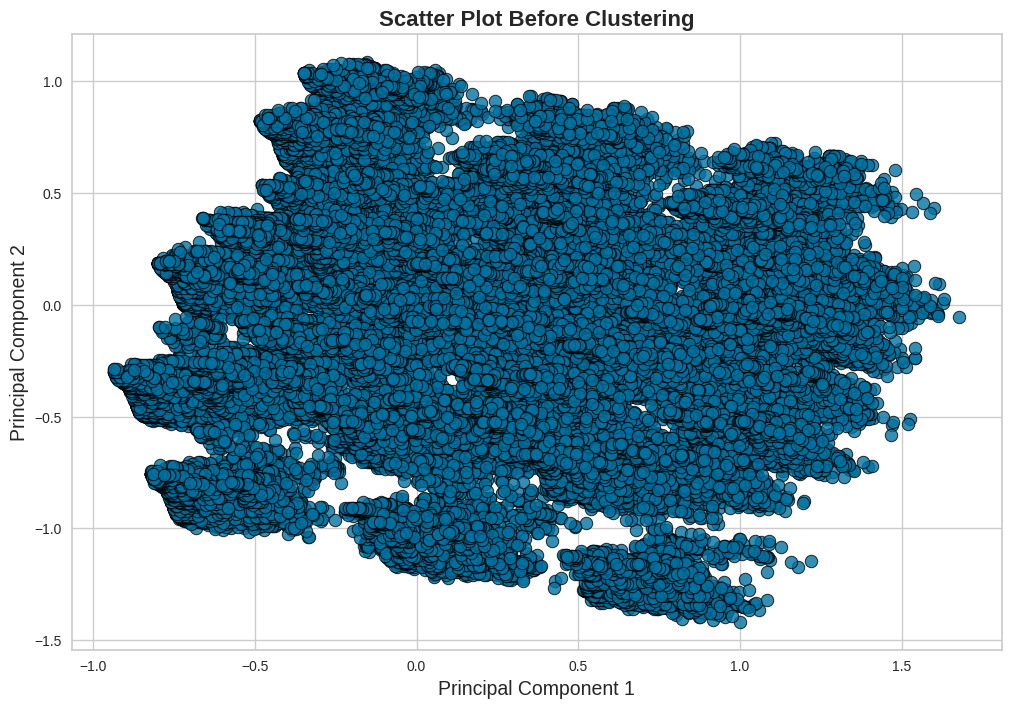

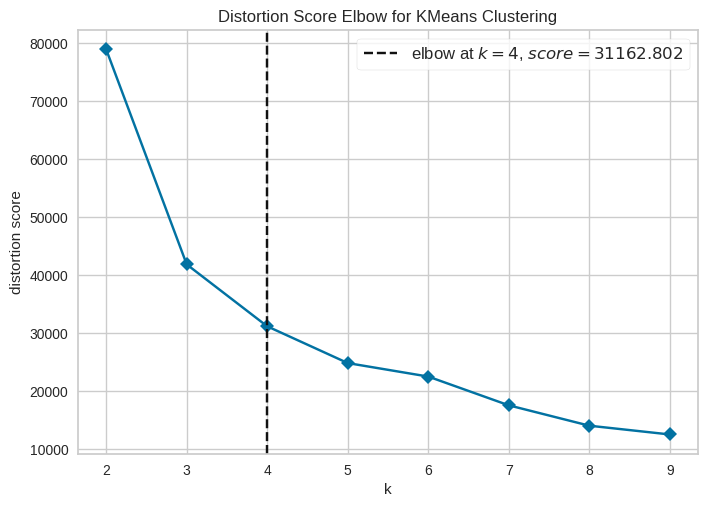

The optimal number of clusters is: 4


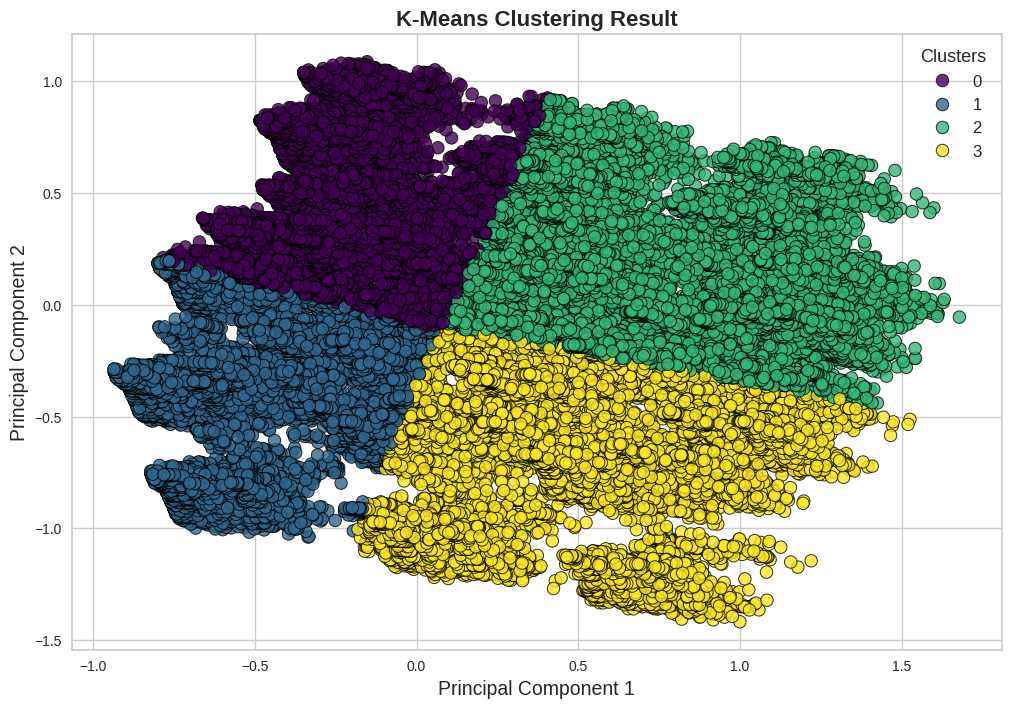

Training and evaluating model for Cluster 0...

Cluster 0 - Accuracy: 0.8705278480042902
Cluster 0 - AUC: 0.812416721930688
Cluster 0 - Confusion Matrix:
[[10853   362]
 [ 1328   510]]
Cluster 0 - Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93     11215
         1.0       0.58      0.28      0.38      1838

    accuracy                           0.87     13053
   macro avg       0.74      0.62      0.65     13053
weighted avg       0.85      0.87      0.85     13053

Training and evaluating model for Cluster 1...

Cluster 1 - Accuracy: 0.9581548893647395
Cluster 1 - AUC: 0.7568249719653076
Cluster 1 - Confusion Matrix:
[[10733     4]
 [  465     6]]
Cluster 1 - Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     10737
         1.0       0.60      0.01      0.02       471

    accuracy                           0.96     11208
   macro avg  

{0: {'Accuracy': 0.8705278480042902,
  'AUC': 0.812416721930688,
  'Confusion Matrix': array([[10853,   362],
         [ 1328,   510]]),
  'Classification Report': '              precision    recall  f1-score   support\n\n         0.0       0.89      0.97      0.93     11215\n         1.0       0.58      0.28      0.38      1838\n\n    accuracy                           0.87     13053\n   macro avg       0.74      0.62      0.65     13053\nweighted avg       0.85      0.87      0.85     13053\n'},
 1: {'Accuracy': 0.9581548893647395,
  'AUC': 0.7568249719653076,
  'Confusion Matrix': array([[10733,     4],
         [  465,     6]]),
  'Classification Report': '              precision    recall  f1-score   support\n\n         0.0       0.96      1.00      0.98     10737\n         1.0       0.60      0.01      0.02       471\n\n    accuracy                           0.96     11208\n   macro avg       0.78      0.51      0.50     11208\nweighted avg       0.94      0.96      0.94     1120

In [21]:
mdp.trainAndTestKmeansClassifiers(DATA_PATH='data/Dataset_revised_new.csv', sampling=None)